##install tensorflow

In [ ]:
# !pip install -q -U tensorflow==1.7.0

     |████████████████████████████████| 48.0MB 93kB/s 
     |████████████████████████████████| 3.1MB 49.0MB/s 
     |████████████████████████████████| 890kB 30.1MB/s 


##Import necessary Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
layers=keras.layers
import seaborn as sn
import matplotlib.pyplot as plt
import pickle
from google.colab import files


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Load Data of student's 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Student Performance Prediction/students.csv') 
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese


##Cleaning the data

In [ ]:
# Removing the output column from dataset
# print(data[data.G3==0].count())
data.drop(data[data.G3==0].index,inplace=True)

##Convert G1, G2 and G3 columns into 5 different Classes

In [ ]:
data['FinalGrade'] = 'na'
data['Grade1'] = 'na'
data['Grade2'] = 'na'

data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 

data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 

data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,Satisfactory,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,Satisfactory,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,Satisfactory,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,Satisfactory,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,Satisfactory,Satisfactory,Satisfactory


##Encode the necessary Columns

In [ ]:
#Label encode Mjon, Fjob, reason, guardian
le=LabelEncoder()
data.Mjob=le.fit_transform(data.Mjob)
data.Fjob=le.fit_transform(data.Fjob)
data.reason=le.fit_transform(data.reason)
data.guardian=le.fit_transform(data.guardian)
data.Grade1=le.fit_transform(data.Grade1)
data.Grade2=le.fit_transform(data.Grade2)
data.FinalGrade=le.fit_transform(data.FinalGrade)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject,FinalGrade,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,0,4,0,1,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portuguese,4,1,4
1,GP,F,17,U,GT3,T,1,1,0,2,0,0,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portuguese,4,3,4
2,GP,F,15,U,LE3,T,1,1,0,2,2,1,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portuguese,4,4,4
3,GP,F,15,U,GT3,T,4,2,1,3,1,1,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portuguese,4,4,4
4,GP,F,16,U,GT3,T,3,3,2,2,1,0,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portuguese,4,4,4


##Convert some columns value into binary(0,1)

In [ ]:
#converting Categorical Features
school=pd.get_dummies(data['school'],prefix='school',columns=['school'],drop_first=True)
sex=pd.get_dummies(data['sex'],prefix='sex',drop_first=True)
address=pd.get_dummies(data['address'],prefix='address',drop_first=True)
famsize=pd.get_dummies(data['famsize'],prefix='famsize',drop_first=True)
schoolsup=pd.get_dummies(data['schoolsup'],prefix='schoolsup',drop_first=True)
Pstatus=pd.get_dummies(data['Pstatus'],prefix='Pstatus',drop_first=True)
familysup=pd.get_dummies(data['famsup'],prefix='famsup',drop_first=True)
paid=pd.get_dummies(data['paid'],prefix='paid',drop_first=True)
activities=pd.get_dummies(data['activities'],prefix='activities',drop_first=True)
nursery=pd.get_dummies(data['nursery'],prefix='nursery',drop_first=True)
higher=pd.get_dummies(data['higher'],prefix='higher',drop_first=True)
internet=pd.get_dummies(data['internet'],prefix='internet',drop_first=True)
romantic=pd.get_dummies(data['romantic'],prefix='romantic',drop_first=True)
subject=pd.get_dummies(data['subject'],prefix='subject',drop_first=True)

data.drop(['school','sex','address','famsize','Pstatus','schoolsup','famsup',
           'paid','activities','nursery','higher','internet','romantic','subject'],axis=1,inplace=True)
data=pd.concat([data,school,sex,address,famsize,Pstatus,schoolsup,familysup,
                paid,activities,nursery,higher,internet,romantic,subject],axis=1)
data.head()

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade,Grade1,Grade2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,subject_Portuguese
0,18,4,4,0,4,0,1,2,2,0,4,3,4,1,1,3,4,0,11,11,4,1,4,0,0,1,0,0,1,0,0,0,1,1,0,0,1
1,17,1,1,0,2,0,0,1,2,0,5,3,3,1,1,3,2,9,11,11,4,3,4,0,0,1,0,1,0,1,0,0,0,1,1,0,1
2,15,1,1,0,2,2,1,1,2,0,4,3,2,2,3,3,6,12,13,12,4,4,4,0,0,1,1,1,1,0,0,0,1,1,1,0,1
3,15,4,2,1,3,1,1,1,3,0,3,2,2,1,1,5,0,14,14,14,4,4,4,0,0,1,0,1,0,1,0,1,1,1,1,1,1
4,16,3,3,2,2,1,0,1,2,0,4,3,2,1,2,5,0,11,13,13,4,4,4,0,0,1,0,1,0,1,0,0,1,1,0,0,1


##Separate the data into features and target variables




In [ ]:
# #Seperate data into features and target variables 
X=data.drop(labels=['FinalGrade'],axis=1)
y=data['FinalGrade']


#Feature Selection Methods:
###1: Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 23 of the best features from the Student Performance Prediction Dataset.

In [ ]:
#apply SelectKBest class to extract top 23 best features
bestfeatures = SelectKBest(score_func=chi2, k=23)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(23,'Score'))  #print 23 best features



              Features       Score
16            absences  373.885962
9             failures  250.878095
18              Grade2  174.686911
17              Grade1   92.589593
14                Walc   27.210370
1                 Medu   27.150013
19           school_MS   25.447680
24       schoolsup_yes   23.170544
13                Dalc   22.485006
2                 Fedu   19.735357
3                 Mjob   14.015161
5               reason   13.530448
8            studytime   11.470760
32  subject_Portuguese   10.430104
12               goout    7.978358
7           traveltime    6.554141
15              health    5.675406
31        romantic_yes    5.443484
29          higher_yes    5.129468
26            paid_yes    5.005592
11            freetime    4.839041
21           address_U    3.494067
30        internet_yes    3.434056


###2: Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02439766 0.02456989 0.02216112 0.02070623 0.01855699 0.02043185
 0.01570828 0.01818866 0.01990646 0.0290934  0.02088173 0.02113955
 0.02107101 0.01465258 0.02130205 0.02166767 0.03109342 0.13579264
 0.2973128  0.01474323 0.01445949 0.01180812 0.01458897 0.00950896
 0.01087251 0.0149779  0.01278366 0.01442282 0.01382401 0.01637441
 0.01113661 0.01480951 0.02705583]


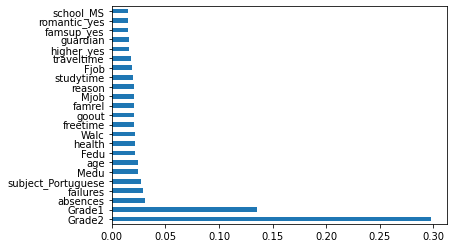

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()


###3:Correlation Matrix
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


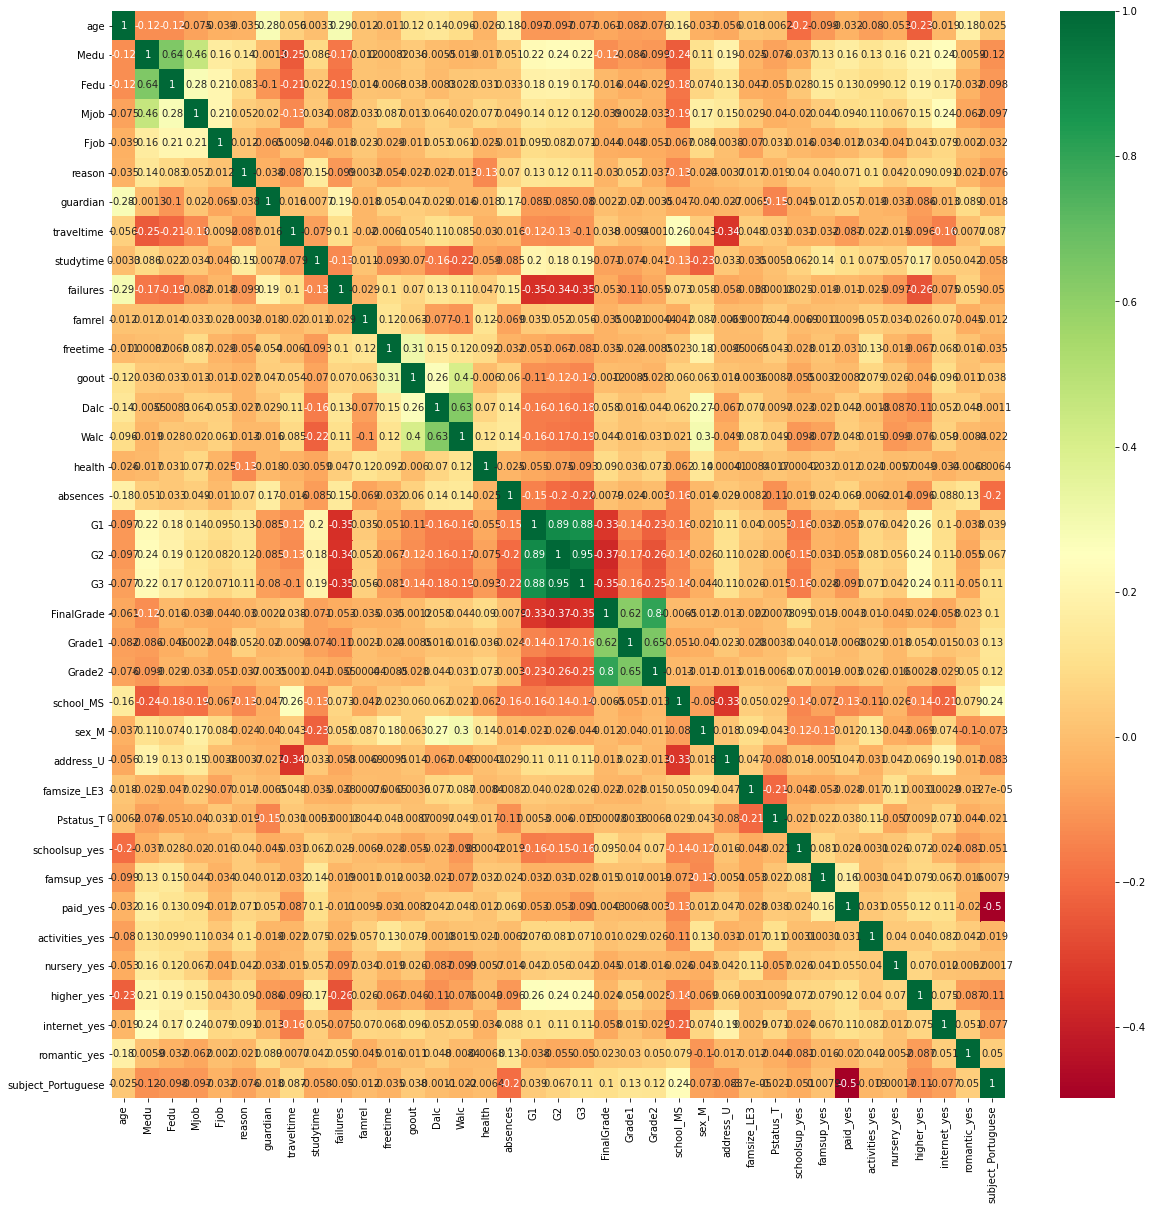

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot heat map
g=sn.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##Remove unnecessary features

In [ ]:
X=data.drop(labels=['G3','G2','G1','reason','nursery_yes',
                           'age','famrel','paid_yes','activities_yes','Pstatus_T',
                           'famsup_yes','higher_yes','guardian'],axis=1)

##Divide Data into training and testing set

####KFold cross validation method

In [ ]:
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)
train_accuracy_model=[]
test_accuracy_model=[]

##Create DNN model

In [ ]:
#define the keras model
model=Sequential()
model.add(Dense(50,input_dim=23, activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(5,activation='softmax'))

##Compilation of model

In [ ]:
#compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##Make Modek Chekpoint file to store the value of weights when accuracy is improve

In [ ]:
# # checkpoint
# filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# callbacks=callbacks_list,
# validation_split=0.30,

##Fit the model

In [ ]:
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test) 
    history=model.fit(X_train,y_train,epochs=800,batch_size=32,
                      validation_data=(X_test, y_test),callbacks=callbacks_list,
                      verbose=0)
    # Append to accuracy_model the accuracy of the model
    train_accuracy_model.append(model.evaluate(X_train,y_train, verbose=0))
    test_accuracy_model.append(model.evaluate(X_test,y_test,verbose=0))


Streaming output truncated to the last 5000 lines.
Epoch 00701: val_accuracy did not improve from 0.97475

Epoch 00702: val_accuracy did not improve from 0.97475

Epoch 00703: val_accuracy did not improve from 0.97475

Epoch 00704: val_accuracy did not improve from 0.97475

Epoch 00705: val_accuracy did not improve from 0.97475

Epoch 00706: val_accuracy did not improve from 0.97475

Epoch 00707: val_accuracy did not improve from 0.97475

Epoch 00708: val_accuracy did not improve from 0.97475

Epoch 00709: val_accuracy did not improve from 0.97475

Epoch 00710: val_accuracy did not improve from 0.97475

Epoch 00711: val_accuracy did not improve from 0.97475

Epoch 00712: val_accuracy did not improve from 0.97475

Epoch 00713: val_accuracy did not improve from 0.97475

Epoch 00714: val_accuracy did not improve from 0.97475

Epoch 00715: val_accuracy did not improve from 0.97475

Epoch 00716: val_accuracy did not improve from 0.97475

Epoch 00717: val_accuracy did not improve from 0.9747

##Evaluating the model

In [ ]:
#Fold wise accuracy

print("Train accuracy Fold wise:")
print(train_accuracy_model)

print("Test accuracy Fold wise:")
print(test_accuracy_model)



Train accuracy Fold wise:
[[8.04358670551885e-07, 1.0], [8.072556357100568e-08, 1.0], [3.397389086044365e-08, 1.0], [2.6156890324432467e-08, 1.0], [1.4882368785556812e-08, 1.0], [1.4148575841785613e-08, 1.0], [8.117655903224269e-09, 1.0], [9.320271498674806e-09, 1.0], [7.817001921479916e-09, 1.0], [6.3137323420449794e-09, 1.0]]
Test accuracy Fold wise:
[[6.842810684712089, 0.7386934757232666], [2.705600227972474, 0.8030303120613098], [0.7196809701841134, 0.9090909361839294], [0.7867819890747378, 0.9090909361839294], [0.5259839606405509, 0.9494949579238892], [0.518501692231576, 0.9396985173225403], [0.31097024015786584, 0.9595959782600403], [0.400149014909182, 0.9545454382896423], [0.48614732958282336, 0.9595959782600403], [0.43944843919275123, 0.9595959782600403]]


In [ ]:
#evaluate the model
train_loss, train_acc=model.evaluate(X_train,y_train, verbose=0)
test_loss, test_acc=model.evaluate(X_test,y_test,verbose=0)
print('Train accuracy:', train_acc," Train loss:",train_loss)
print('Test accuracy:', test_acc," Test loss:",test_loss)

Train accuracy: 1.0  Train loss: 6.3137323420449794e-09
Test accuracy: 0.9595959782600403  Test loss: 0.43944843919275123


##Store DNN model in pickle file

In [ ]:
#save model to disk
filename='KFold_final_classification_model.pkl'
pickle.dump(model,open(filename,'wb'))

##Load DNN model from Pickle file

In [ ]:
#load the model from disk
load_model=pickle.load(open(filename,'rb'))
result=load_model.evaluate(X_test,y_test)
print(result)

198/198 [==============================] - 0s 174us/step
[0.43944843919275123, 0.9595959782600403]


##Download Pickle file

In [ ]:
files.download('KFold_final_classification_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>